# Wine Quality - Exploration and Data Preparation

NOTE: This analysis was adapted from the one published on Github by user `dmclark53`:

https://github.com/dmclark53/Wine-Quality/blob/master/Wine%20Quality%20-%20Data%20Preparation.ipynb

## Required Packages
We recommend you use virtual environments managed by Poetry. 
You will need the packages listed 
below installed in your virtual environment (if they aren't already):

`numpy  pandas  seaborn  natsort  matplotlib`

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from natsort import natsorted

sb.set_context("notebook", font_scale=2.5) # Comment this line if you are running directly in Python.
%matplotlib inline

/var/folders/49/qhkpplds6xxghpsg8cyk9crc0000gn/T/ipykernel_41415/724823607.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the data

The data can be loaded with the Pandas `read_csv` method.  Use the full path
to where you have saved "winequality-red.csv" as the filename.  Remember, the
separator in these files is a semi-colon, so you will have to supply use 
the `sep` argument.  Documentation at:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
# Load the data into a Pandas DataFrame
red_wine = pd.read_csv('winequality_data/winequality-red.csv', sep=';')

In [3]:
# Load the data into a Pandas DataFrame
#red_wine = TODO:_COMPLETE_THIS_STATEMENT_TO_READ_THE_CSV_FILE_THEN_UNCOMMENT
white_wine = pd.read_csv('winequality_data/winequality-white.csv', sep=';')

### Data Exploration

In [4]:
# TODO: Use the `head` method of the `red_wine` DataFrame to verify visually that
# the data were loaded correctly.
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# TODO: Use the `info` method of the `red_wine` DataFrame to verify visually that
# the data types are you you expect.
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# TODO: Use the `describe` method of the `red_wine` DataFrame to examine the ranges
# of values found in the dataset.  You may prefer to transpose the output by adding
# the additional `.T` to the end if you like.

red_wine.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Data Visualization
Make a scatter plot matrix using seaborn to visualize the data and the relationship between the different features.

In [7]:
# TODO: Print the column names of the `red_wine` dataframe using its `columns` attibute.

#print( TODO:_COMPLETE_THIS_PART ) # Complete this statement then un-comment to run it.
print(red_wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
# We often want to avoid the "output" column (the dependant variable is quality)
# So, create a list of columns that doesn't include 'quality':
# (HINT): since 'quality' is the last column, you want all of the column names
# except the last one -- you can use Python list slicing notation to get "all except
# the last" item.

column_list = red_wine.columns[:-1]

In [9]:
# These are our input variables (hopefully independent variables, but we'll see...)
# NOTE: The following should output the column names _without_ 'quality'.

print(column_list) # TODO: UNCOMMENT THIS LINE AFTER COMPLETING THE PREVIOUS TODO ITEM.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Now we can create a Seaborn "pairplot" to show each pair of variables plotted as
a scatterplot against each other, with histograms of each variable's values along
the diagonal.
See options at:
https://seaborn.pydata.org/generated/seaborn.pairplot.html
We suggest using a "height" option between 3 and 5.

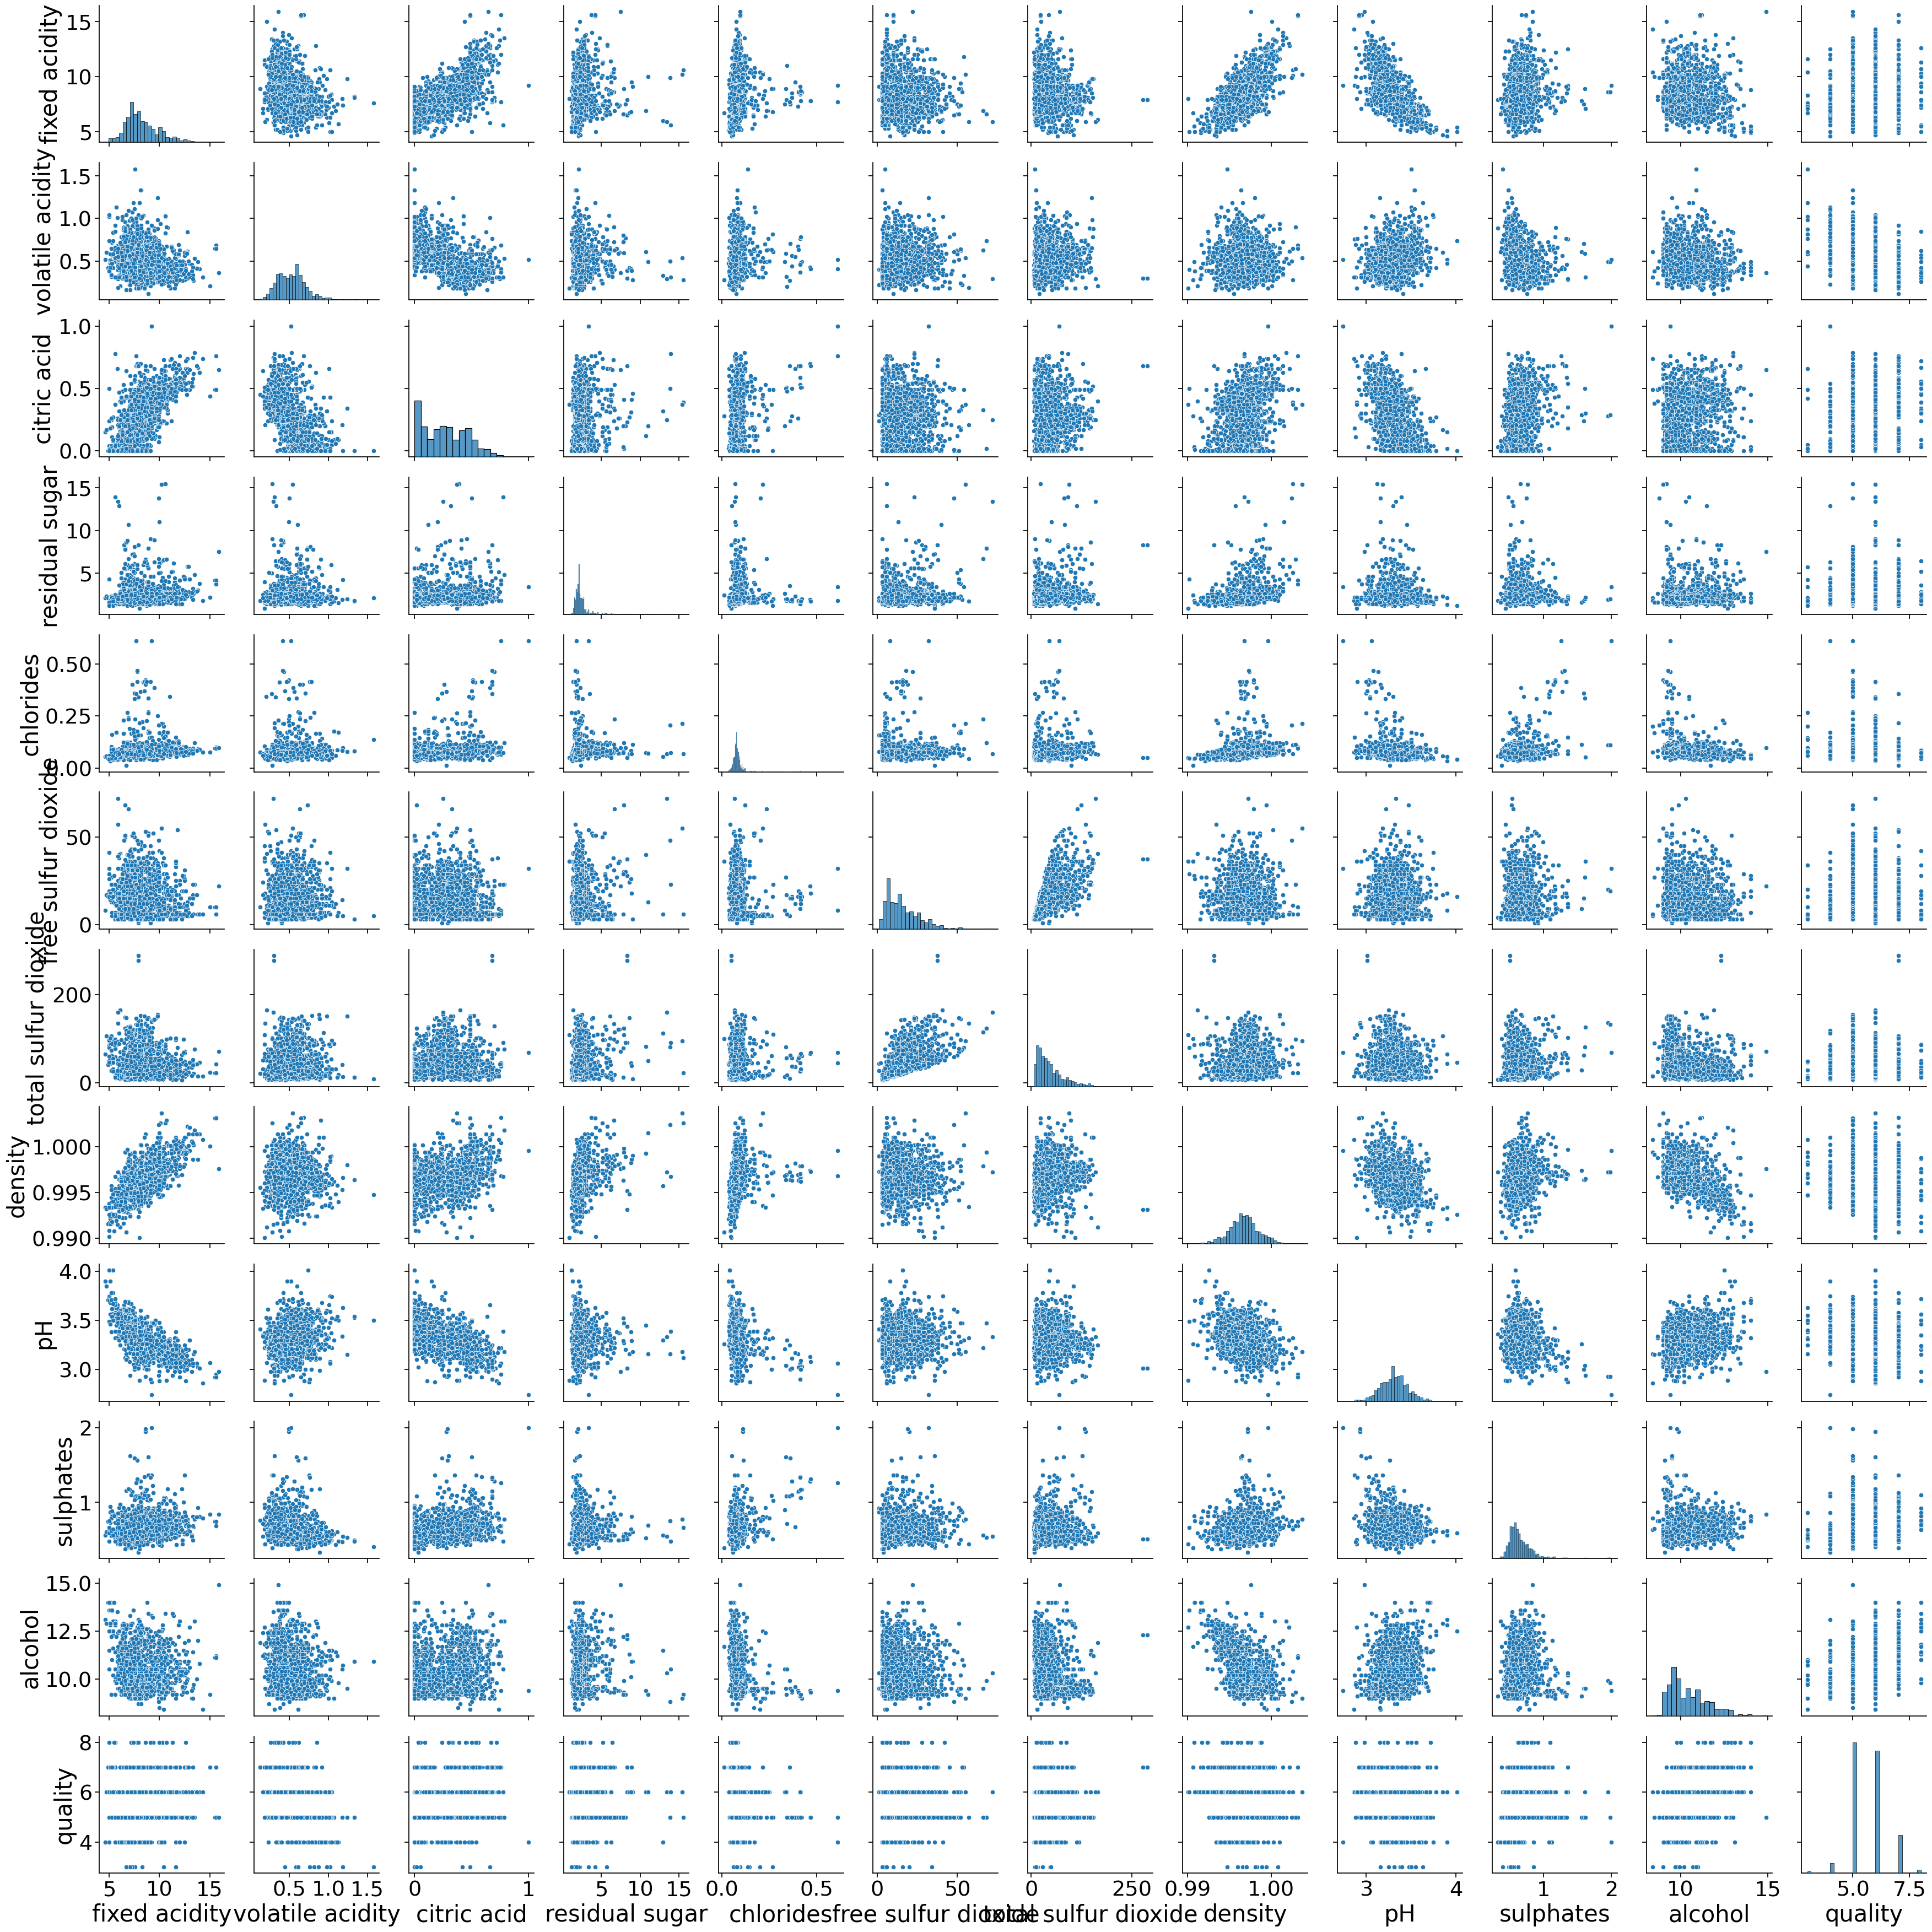

In [10]:
# TODO: write a statement to create the pairplot here:
sb.pairplot(red_wine, height=3)